### Sonar Prediction (Rock Vs Mine) 

Importing Important Libraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

Read the dataset

In [2]:
df = pd.read_csv("Copy of sonar data.csv", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Replace target labels with numerical values

In [4]:
df[60].replace({'R': 0, 'M': 1}, inplace=True)

Display basic information about the dataset

In [5]:
print(f"Shape of dataset --> {df.shape}")
print(f"Size of dataset --> {df.size}")
print(f"Dimension of dataset --> {df.ndim}")

Shape of dataset --> (208, 61)
Size of dataset --> 12688
Dimension of dataset --> 2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [8]:
df[60].value_counts()

60
1    111
0     97
Name: count, dtype: int64

In [9]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
0,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024
1,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930


Data Visualization (Histograms, Heatmap, Boxplots)

Histograms 

In [10]:
# Visualizations are commented out to avoid clutter in the GitHub.
'''
# Divide featues into rows and columns 

nrows = 10 
ncols = 6 

fig,axes = plt.subplots(nrows,ncols,figsize = (20,30)) 

axes = axes.flatten()

for i in range(len(df.columns)-1):
    ax = axes[i] 
    ax.hist(df.iloc[:,i],bins = 30, color = 'skyblue',edgecolor = 'black')

plt.tight_layout() 

plt.show()

'''

"\n# Divide featues into rows and columns \n\nnrows = 10 \nncols = 6 \n\nfig,axes = plt.subplots(nrows,ncols,figsize = (20,30)) \n\naxes = axes.flatten()\n\nfor i in range(len(df.columns)-1):\n    ax = axes[i] \n    ax.hist(df.iloc[:,i],bins = 30, color = 'skyblue',edgecolor = 'black')\n\nplt.tight_layout() \n\nplt.show()\n\n"

HeatMap

In [11]:
'''
plt.figure(figsize=(80,50)) 
correlation = df.corr()

sns.heatmap(correlation, cbar= True,square= True, fmt = '.2f', annot= True, annot_kws={'size' : 10}, cmap='Blues')

plt.show()

'''

"\nplt.figure(figsize=(80,50)) \ncorrelation = df.corr()\n\nsns.heatmap(correlation, cbar= True,square= True, fmt = '.2f', annot= True, annot_kws={'size' : 10}, cmap='Blues')\n\nplt.show()\n\n"

Boxplots 

In [12]:
'''

nrows = 10 
ncols = 6 

fig,axes = plt.subplots(nrows,ncols,figsize=(20,30)) 

axes = axes.flatten() 

for i in range(len(df.columns)-1):
    ax = axes[i] 
    ax.boxplot(df.iloc[:,i],vert= False) 
    
plt.tight_layout() 

plt.show()
'''


'\n\nnrows = 10 \nncols = 6 \n\nfig,axes = plt.subplots(nrows,ncols,figsize=(20,30)) \n\naxes = axes.flatten() \n\nfor i in range(len(df.columns)-1):\n    ax = axes[i] \n    ax.boxplot(df.iloc[:,i],vert= False) \n    \nplt.tight_layout() \n\nplt.show()\n'

### Some Insights 

#### Data Exploration 
1.  Set a correlation threshold to focus on highly correlated features.
2. Use hierarchical clustering to group similar features for better organization.
3. Apply dimensionality reduction techniques to visualize relationships in lower-dimensional space.
4. Implement interactive visualization tools for dynamic exploration of the heatmap.
5. Features with numerous outliers may reflect greater data variability and complexity.
6. Domain expertise can provide insights into the significance of outliers in specific features.

#### Data Preprocessing 
1. Outliers may be present, impacting distribution; implement outlier detection and handling strategies.
2. Skewed data can challenge model assumptions; apply transformation techniques for improved performance.
3. Nonuniform distributions may signify data quality issues; conduct thorough preprocessing to address errors and biases.
4. High outlier count in features may indicate data quality issues requiring investigation. 

#### Feature Engineering 
1. Apply feature selection to prioritize relevant features.
2. Non-uniform distributions highlight potentially significant features for class differentiation; prioritize them in model training.
3. Outliers in certain features may contain valuable information crucial for understanding underlying patterns.
4. Features with high outlier count may require special treatment during feature engineering.


#### Model Training 
1. Models may be sensitive to non-uniform distributions; utilize robust techniques or class weights for improved resilience. 
2. Outliers can significantly impact model performance; consider appropriate handling strategies.
3. Models trained on features with numerous outliers may exhibit sensitivity; utilize robust techniques.



 Calculate correlation matrix

In [13]:
correlation_matrix = df.corr()
threshold = 0.50

# Find highly correlated features
highly_correlated_features = correlation_matrix[abs(correlation_matrix) > threshold].stack().index.tolist()
most_significant_features = set()
for f1, f2 in highly_correlated_features:
    if f1 != f2:
        most_significant_features.add(f1)
        most_significant_features.add(f2)

least_significant_features = set(df.columns) - most_significant_features

print("Most Significant Features:")
print(most_significant_features)
print("\nLeast Significant Features:")
print(least_significant_features)

Most Significant Features:
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59}

Least Significant Features:
{60, 53}


Calculate correlation with target

In [14]:
corr_target = correlation_matrix.iloc[-1, :]
for item in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print(f"{item} --> {(corr_target > item).sum()}")

0.1 --> 36
0.2 --> 22
0.3 --> 11
0.4 --> 2
0.5 --> 1


Since the number of highly correlated features is low, PCA might not be a great idea.

Divide dataset into features (X) and target (y)

In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, 60]


Split dataset into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Standardize features

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Initialize empty lists to store model names and accuracies

In [18]:
models = []
training_accuracies = []
testing_accuracies = []

### Models 

Logistic Regression

In [19]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

training_accuracy1 = model1.score(X_train, y_train)
testing_accuracy1 = model1.score(X_test, y_test)

models.append('Logistic Regression')
training_accuracies.append(training_accuracy1)
testing_accuracies.append(testing_accuracy1)

In [20]:
print(f"Confusion Matrix of Training data:\n{confusion_matrix(y_train, y_train_pred1)}")
print(f"Confusion Matrix of Testing data:\n{confusion_matrix(y_test, y_test_pred1)}\n")
print(f"Classification Report of Training data:\n\n{classification_report(y_train, y_train_pred1)}")
print(f"Classification Report of Testing data:\n\n{classification_report(y_test, y_test_pred1)}")

Confusion Matrix of Training data:
[[66  5]
 [ 5 80]]
Confusion Matrix of Testing data:
[[21  5]
 [ 1 25]]

Classification Report of Training data:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        71
           1       0.94      0.94      0.94        85

    accuracy                           0.94       156
   macro avg       0.94      0.94      0.94       156
weighted avg       0.94      0.94      0.94       156

Classification Report of Testing data:

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.83      0.96      0.89        26

    accuracy                           0.88        52
   macro avg       0.89      0.88      0.88        52
weighted avg       0.89      0.88      0.88        52



Support Vector Machine

In [21]:
model2 = SVC()
model2.fit(X_train, y_train)
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)
training_accuracy2 = model2.score(X_train, y_train)
testing_accuracy2 = model2.score(X_test, y_test)
models.append('Support Vector Machine')
training_accuracies.append(training_accuracy2)
testing_accuracies.append(testing_accuracy2)


In [22]:
print(f"Confusion Matrix of Training data:\n{confusion_matrix(y_train, y_train_pred2)}")
print(f"Confusion Matrix of Testing data:\n{confusion_matrix(y_test, y_test_pred2)}\n")
print(f"Classification Report of Training data:\n\n{classification_report(y_train, y_train_pred2)}")
print(f"Classification Report of Testing data:\n\n{classification_report(y_test, y_test_pred2)}")

Confusion Matrix of Training data:
[[68  3]
 [ 1 84]]
Confusion Matrix of Testing data:
[[18  8]
 [ 1 25]]

Classification Report of Training data:

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.97      0.99      0.98        85

    accuracy                           0.97       156
   macro avg       0.98      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156

Classification Report of Testing data:

              precision    recall  f1-score   support

           0       0.95      0.69      0.80        26
           1       0.76      0.96      0.85        26

    accuracy                           0.83        52
   macro avg       0.85      0.83      0.82        52
weighted avg       0.85      0.83      0.82        52



 Decision Trees

In [23]:
model3 = DecisionTreeClassifier(max_depth=4)
model3.fit(X_train, y_train)
y_train_pred3 = model3.predict(X_train)
y_test_pred3 = model3.predict(X_test)
training_accuracy3 = model3.score(X_train, y_train)
testing_accuracy3 = model3.score(X_test, y_test)
models.append('Decision Trees')
training_accuracies.append(training_accuracy3)
testing_accuracies.append(testing_accuracy3)

In [24]:
print(f"Confusion Matrix of Training data:\n{confusion_matrix(y_train, y_train_pred3)}")
print(f"Confusion Matrix of Testing data:\n{confusion_matrix(y_test, y_test_pred3)}\n")
print(f"Classification Report of Training data:\n\n{classification_report(y_train, y_train_pred3)}")
print(f"Classification Report of Testing data:\n\n{classification_report(y_test, y_test_pred3)}")

Confusion Matrix of Training data:
[[68  3]
 [ 1 84]]
Confusion Matrix of Testing data:
[[20  6]
 [ 5 21]]

Classification Report of Training data:

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.97      0.99      0.98        85

    accuracy                           0.97       156
   macro avg       0.98      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156

Classification Report of Testing data:

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.78      0.81      0.79        26

    accuracy                           0.79        52
   macro avg       0.79      0.79      0.79        52
weighted avg       0.79      0.79      0.79        52



XGBoost

In [25]:
model4 = XGBClassifier()
model4.fit(X_train, y_train)
y_train_pred4 = model4.predict(X_train)
y_test_pred4 = model4.predict(X_test)
training_accuracy4 = model4.score(X_train, y_train)
testing_accuracy4 = model4.score(X_test, y_test)
models.append('XGBoost')
training_accuracies.append(training_accuracy4)
testing_accuracies.append(testing_accuracy4)

In [26]:
print(f"Confusion Matrix of Training data:\n{confusion_matrix(y_train, y_train_pred4)}")
print(f"Confusion Matrix of Testing data:\n{confusion_matrix(y_test, y_test_pred4)}\n")
print(f"Classification Report of Training data:\n\n{classification_report(y_train, y_train_pred4)}")
print(f"Classification Report of Testing data:\n\n{classification_report(y_test, y_test_pred4)}")

Confusion Matrix of Training data:
[[71  0]
 [ 0 85]]
Confusion Matrix of Testing data:
[[22  4]
 [ 2 24]]

Classification Report of Training data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        85

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156

Classification Report of Testing data:

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.86      0.92      0.89        26

    accuracy                           0.88        52
   macro avg       0.89      0.88      0.88        52
weighted avg       0.89      0.88      0.88        52



Random Forest

In [27]:
model5 = RandomForestClassifier()
model5.fit(X_train, y_train)
y_train_pred5 = model5.predict(X_train)
y_test_pred5 = model5.predict(X_test)
training_accuracy5 = model5.score(X_train, y_train)
testing_accuracy5 = model5.score(X_test, y_test)
models.append('Random Forest')
training_accuracies.append(training_accuracy5)
testing_accuracies.append(testing_accuracy5)

In [28]:
print(f"Confusion Matrix of Training data:\n{confusion_matrix(y_train, y_train_pred5)}")
print(f"Confusion Matrix of Testing data:\n{confusion_matrix(y_test, y_test_pred5)}\n")
print(f"Classification Report of Training data:\n\n{classification_report(y_train, y_train_pred5)}")
print(f"Classification Report of Testing data:\n\n{classification_report(y_test, y_test_pred5)}")

Confusion Matrix of Training data:
[[71  0]
 [ 0 85]]
Confusion Matrix of Testing data:
[[17  9]
 [ 0 26]]

Classification Report of Training data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        85

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156

Classification Report of Testing data:

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        26
           1       0.74      1.00      0.85        26

    accuracy                           0.83        52
   macro avg       0.87      0.83      0.82        52
weighted avg       0.87      0.83      0.82        52



Create a DataFrame to store the results of all models

In [29]:
results_df = pd.DataFrame({
    'Model': models,
    'Training Accuracy': training_accuracies,
    'Testing Accuracy': testing_accuracies
})

# Print the results DataFrame
print("Results of all models:")
print(results_df)

# Save the results to a new dataset
results_df.to_csv("model_accuracies.csv", index=False)

Results of all models:
                    Model  Training Accuracy  Testing Accuracy
0     Logistic Regression           0.935897          0.884615
1  Support Vector Machine           0.974359          0.826923
2          Decision Trees           0.974359          0.788462
3                 XGBoost           1.000000          0.884615
4           Random Forest           1.000000          0.826923


Plot a histogram of testing accuracies for all models

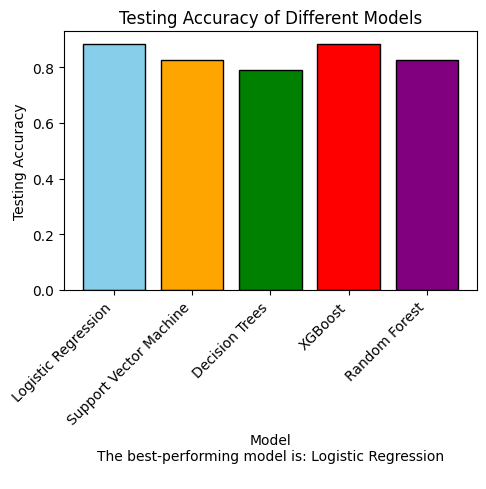

In [30]:


best_model = results_df.loc[results_df['Testing Accuracy'].idxmax(), 'Model']
plt.figure(figsize=(5,5))
plt.bar(results_df['Model'], results_df['Testing Accuracy'], color=['skyblue', 'orange', 'green', 'red', 'purple'], edgecolor="black")
plt.xlabel(f"Model\nThe best-performing model is: {best_model}\n")
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("model_accuracies_histogram.png")
plt.show()